<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pokemon-Analysis" data-toc-modified-id="Pokemon-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pokemon Analysis</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Show-the-distribution-of-the-pokemon-base-stats" data-toc-modified-id="Show-the-distribution-of-the-pokemon-base-stats-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Show the distribution of the pokemon base stats</a></span></li><li><span><a href="#Perfrom-Principal-Component-Analysis" data-toc-modified-id="Perfrom-Principal-Component-Analysis-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Perfrom Principal Component Analysis</a></span></li></ul></li><li><span><a href="#Visualize-the-dataset" data-toc-modified-id="Visualize-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualize the dataset</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Mean-Shift-Clustering" data-toc-modified-id="Mean-Shift-Clustering-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Mean Shift Clustering</a></span></li><li><span><a href="#VBGMM" data-toc-modified-id="VBGMM-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>VBGMM</a></span></li></ul></li></ul></li><li><span><a href="#Pokemon-Combat-Prediction" data-toc-modified-id="Pokemon-Combat-Prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pokemon Combat Prediction</a></span></li></ul></div>

# Pokemon Analysis
## Principal Component Analysis

Since clustering generally depends on some sort of distance measure, which groups the points that are near each other into the same cluster. However, in high dimensional spaces, distance measures do not work very well. Therefore, I tried to reduce the number of dimensions first by implementing PCA so that the distance metric can make sense.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#load pokemon data
pokemon = pd.read_csv("/Users/gillianchiang/Desktop/Course/year4_sem2/COMP4912/Data/pokemon-challenge/pokemon.csv")

### Show the distribution of the pokemon base stats

<function pandas.plotting._misc.scatter_matrix>

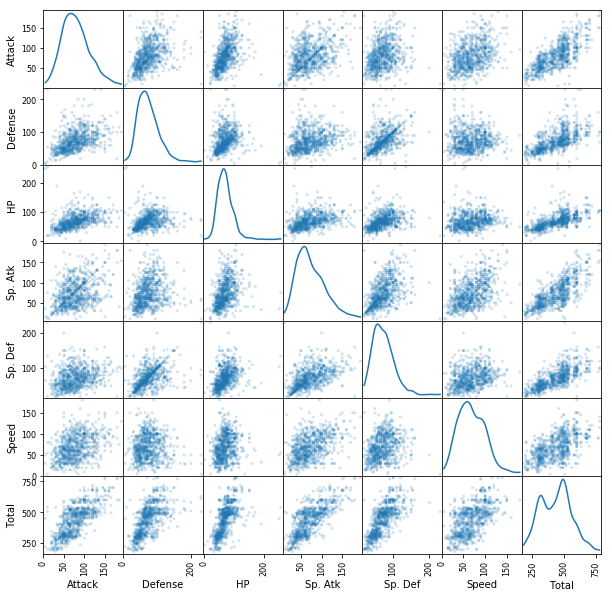

In [4]:
from pandas.plotting import scatter_matrix
pokemon["Total"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
stats=['Attack', 'Defense','HP', 'Sp. Atk','Sp. Def', 'Speed', 'Total']
scatter_matrix(pokemon[stats], alpha=0.2, figsize=(10, 10), diagonal='kde')
scatter_matrix

In [5]:
#standardize the data
stat = ['HP', 'Attack', 'Defense', 'Sp. Atk','Sp. Def', 'Speed']
poke_stat_scaled = StandardScaler().fit_transform(pokemon[stat])

print("mean: "+str(poke_stat_scaled[:,0].mean()))  # very close to 0
print("SD: "+str(poke_stat_scaled[:,0].std()))  # very close to 1

mean: -2.48689957516e-16
SD: 1.0


### Perfrom Principal Component Analysis

In [6]:
#pca
pca = PCA(n_components = 0.8) # consider enough components to explain 80% of the variance
pcscores = pd.DataFrame(pca.fit_transform(poke_stat_scaled)) #6 stats -> 4 principle components
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
pcscores.head()

,PC1,PC2,PC3,PC4
0,-1.556375,-0.021482,0.666504,0.184176
1,-0.362867,-0.050269,0.667913,0.269254
2,1.280152,-0.062720,0.623914,0.331391
3,2.620916,0.704263,0.995538,-0.199321
4,-1.758284,-0.706179,0.411454,-0.268602


After performing PCA, <b>6</b> base stats are reduced to <b>4</b> principal components. The values are served as <b>weights</b> to see which parameters are most important for a particular principal component.

In [7]:
#loading factors
loadings = pd.DataFrame(pca.components_, columns=stat)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
PC2,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
PC3,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
PC4,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163


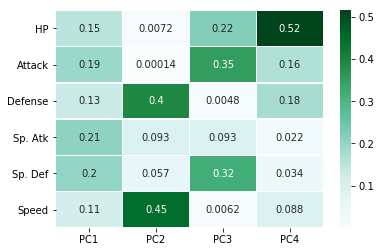

In [8]:
#visualize the square values of loading factors
load_sqr = loadings**2 #so that the sum of the stats will equal to 1
ax1 = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=0)
ax1.set_yticklabels(ax1.yaxis.get_majorticklabels(), rotation=0)
plt.show()

The darkest shades in the plot above indicate which parameters are the most important. For example, PC4 show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of PC4.<br>
<br>
However, if you want to see more trends, the <b>actual values</b> of the loading factors will give you more insights:

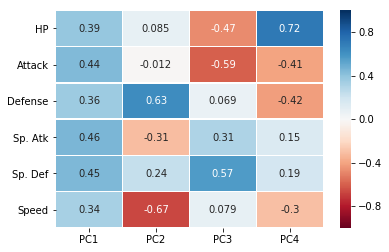

In [9]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0)
plt.show()

For example, a Pokemon with high Defense or low Speed will have a positive value of PC2. On the other hand, things like Attack or Sp. Defense will control what value a Pokemon will have for PC3.

The next step, I would like first visualize the dataset, then implement clustering method to find out the how the pokemons can be grouped together.

--------------------------------

## Visualize the dataset

I use <b>biplot</b> to examine the data, which is a scatter plot with vectors indicating what direction a datapoint will take in the PCA given its underlying parameters. In addition, the <b>Pokemon Type</b> will be colored to see if there is any obvious trends.

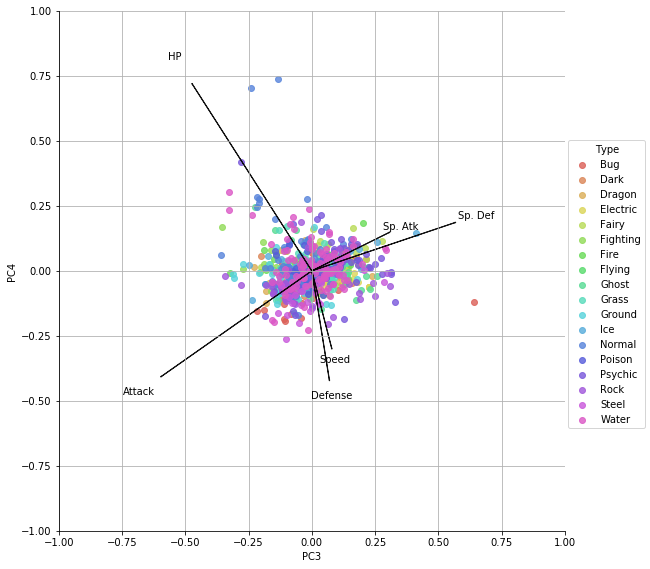

In [10]:
from math import sqrt
# Create labels abased on Type 1
labels = set(pokemon['Type 1'])
pokemon['type'] = pokemon['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
pokemon = pokemon.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = pokemon['Type 1']
pc_types = pc_types.sort_values('Type')

# Biplots
def biplot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=8, palette=sns.color_palette("hls", n_colors=20))

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')
        
    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))   
    plt.grid(True)
    
# Actually make a biplot (PC3 vs PC4)
biplot(pc_types, loadings, 2, 3, max_arrow=0.3)

<b>Check whether the PCA result is as expected:</b>
- There are 2 normal type pokemon with high value of PC4, which means they probably have high HP and low Attack, Defense and Speed. 

In [11]:
pcscores.head()

,PC1,PC2,PC3,PC4
0,-1.556375,-0.021482,0.666504,0.184176
1,-0.362867,-0.050269,0.667913,0.269254
2,1.280152,-0.062720,0.623914,0.331391
3,2.620916,0.704263,0.995538,-0.199321
4,-1.758284,-0.706179,0.411454,-0.268602


In [12]:
#find the pokemons in PC4 with highest HP
pc4_poke = pc_types.sort_values(by='PC4', ascending=False)[:2]
pokemon.loc[pc4_poke.index]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,type
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540,0
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450,0


In [13]:
#sort the pokemon data by HP
pokemon.sort_values(by='HP', ascending=False)[:2]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,type
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540,0
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450,0


- There is 1 bug type pokemon with high value of PC3, which means it probably has high Sp. Def and low HP, Sp. Atk and Speed. 

In [14]:
#find the pokemons in PC3 with highest Sp. Def
pc3_poke = pc_types.sort_values(by='PC3', ascending=False)[:1]
pokemon.loc[pc3_poke.index]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,type
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,3


In [15]:
pokemon.sort_values(by='Sp. Def', ascending=False)[:1]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,type
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,3



The result is as expected. However, most pokemons are centrally distributed, which can hardly observe any trends between the types. 

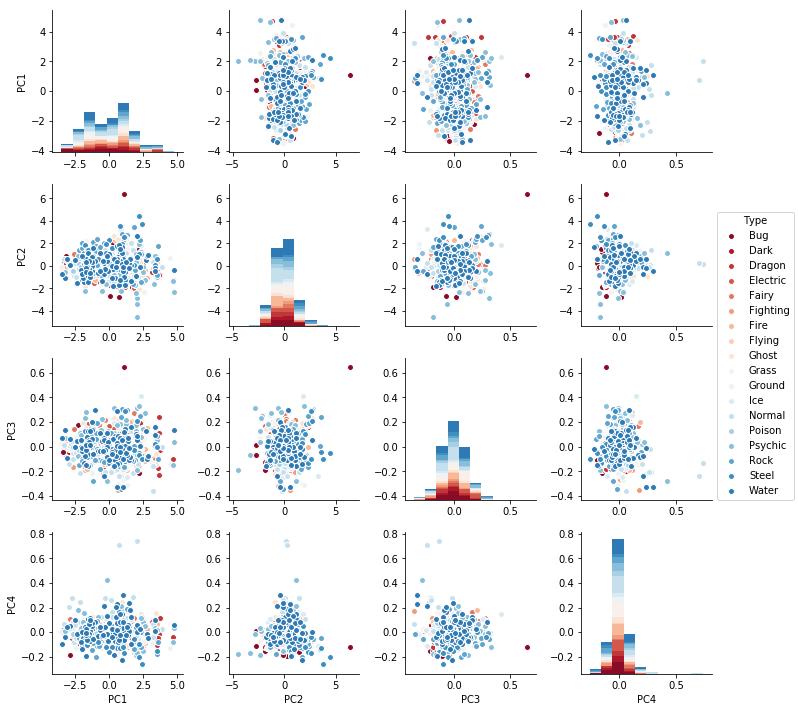

In [16]:
g = sns.pairplot(pc_types, hue='Type', palette=sns.color_palette("RdBu", n_colors=20))

After visualizing the data, the next step is to implement clustering methods put the pokemons into groups.

--------------------------------

## Clustering
### Mean Shift Clustering

Since we do not know how many clusters will there be in this dataset, we adopted <b>Mean Shift Clustering</b> to implement unsupervised machine learning.

In [17]:
#clustering 
ms = MeanShift()
ms.fit(pcscores)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
pcscores_arr = np.array(pcscores)
colors = ['c', 'b', 'r', 'g', 'm', 'y', 'k', 'w'] 

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = np.asarray((unique, counts)).T
n_clusters_ = len(cluster_counts)

print("Number of estimated clusters:", n_clusters_)
for i in range(len(cluster_counts)):
    group = 'grp'+str(i+1)
    print("Count of "+group+' :', cluster_counts[i][1])

Number of estimated clusters: 3
Count of grp1 : 795
Count of grp2 : 3
Count of grp3 : 2


1. According to the mean shift clustering method, we can discover that most of the pokemons are in the same cluster.
2. Although we reduced the dimensions from 6 to 4, it is still hard to view 4D data, therefore, we tried to used 2D plot and 3D plot to visualize the data with the cluster center. 

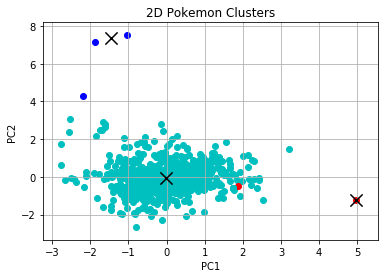

In [18]:
#2D visualization
fig, ax = plt.subplots()
for i in range(len(pcscores_arr)):
    ax.scatter(pcscores_arr[i][2], pcscores_arr[i][3], c=colors[labels[i]])
ax.scatter(cluster_centers[:,2],cluster_centers[:,3], marker="x",color='k', s=150, linewidths = 5, zorder=10)
plt.title('2D Pokemon Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.grid(True)
plt.show()

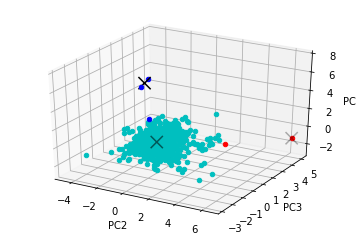

Clusters centers points:
[[-0.49296123 -0.12153059 -0.026432   -0.03369771]
 [ 1.40144978  0.23972975 -1.4577019   7.34232795]
 [ 1.07656453  6.41447043  4.97934432 -1.20451716]]


In [19]:
#3D visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(pcscores_arr)):
    ax.scatter(pcscores_arr[i][1], pcscores_arr[i][2], pcscores_arr[i][3], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,1],cluster_centers[:,2],cluster_centers[:,3], marker="x",color='k', s=150, linewidths = 5, zorder=10)
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC4')
plt.show()
print("Clusters centers points:")
print(cluster_centers)

After trying mean shift clustering method, I would like to try another clustering method, <b>VBGMM</b> to see whether the clustering result will be different.

### VBGMM

------------------------------------

# Pokemon Combat Prediction